# The St Petersburg Paradox

In [32]:
from collections import Counter
from random import random
import matplotlib.pyplot as plt

%matplotlib inline

See https://en.wikipedia.org/wiki/St._Petersburg_paradox

A casino offers a game of chance for a single player in which a fair coin is tossed at each stage. The initial stake starts at 2 dollars and is doubled every time heads appears. The first time tails appears, the game ends and the player wins whatever is in the pot. Thus the player wins 2 dollars if tails appears on the first toss, 4 dollars if heads appears on the first toss and tails on the second, 8 dollars if heads appears on the first two tosses and tails on the third, and so on. Mathematically, the player wins 2k dollars, where k equals number of tosses (k must be a whole number and greater than zero). What would be a fair price to pay the casino for entering the game?

To answer this, one needs to consider what would be the average payout: with probability $1/2$, the player wins 2 dollars; with probability $1/4$, the player wins 4 dollars; with probability $1/8$ the player wins 8 dollars, and so on. The expected value is thus

\begin{aligned}
E&={\frac {1}{2}}\times 2+{\frac {1}{4}}\times 4+{\frac {1}{8}}\times 8+{\frac {1}{16}}\times 16+\cdots \\&=1+1+1+1+\cdots \\&=\infty \,.
\end{aligned}

Assuming the game can continue as long as the coin toss results in heads and in particular that the casino has unlimited resources, this sum grows without bound and so the expected win for repeated play is an infinite amount of money. Considering nothing but the expected value of the net change in one's monetary wealth, one should therefore play the game at any price if offered the opportunity. 

Let's do this via MC methods.

In [11]:
def play_game():
    stake = 2
    while random() > 0.5:
        stake *= 2
    return stake

In [27]:
N_GAMES = 1E5

In [29]:
winnings = [play_game() for i in xrange(int(N_GAMES))]

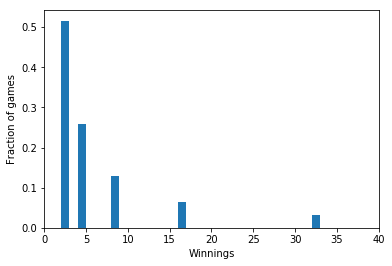

In [46]:
_ = plt.hist(winnings, bins=40, range=[0, 40], normed=True)
# plt.yscale('log')
plt.xlabel("Winnings")
plt.xlim(0, 40)
plt.ylabel("Fraction of games")

In [54]:
print "Average winnings:", sum(winnings) / N_GAMES

Average winnings: 23.13008


In [35]:
c = Counter(winnings)
c.most_common(5)

[(2, 49942), (4, 25029), (8, 12404), (16, 6283), (32, 3155)]

In [48]:
print "Maximum won:", max(winnings)

Maximum won: 524288


524288 is 2^19! So that's 18 heads in a row!

In [53]:
print "Winnings \t Fraction of games"
for k,v in c.most_common(len(c)):
    print "{} \t {:.3e}".format(k, v/N_GAMES)

Winnings 	 Fraction of games
2 	 4.994e-01
4 	 2.503e-01
8 	 1.240e-01
16 	 6.283e-02
32 	 3.155e-02
64 	 1.635e-02
128 	 7.730e-03
256 	 4.220e-03
512 	 1.850e-03
1024 	 6.900e-04
2048 	 4.800e-04
4096 	 2.600e-04
8192 	 1.600e-04
16384 	 7.000e-05
65536 	 3.000e-05
131072 	 1.000e-05
32768 	 1.000e-05
524288 	 1.000e-05


So it looks like the average winnings is 23 dollars. But given that nearly half the games end with the first toss (as expected!) then I'd probably not even pay 10 dollars...

The resolution to this paradox is of course that the sum of probabilities $(0.5  + 0.25  + 0.125 + \cdots)$ does **not** sum to unity - the sum must be divided by $1/2 + 1/4 + 1/8 + 1/16 + \cdots$ to correctly weight each probability